In [1]:
import os
import json
import csv
from IPython.display import display, Image
from datetime import datetime, timedelta

In [2]:
import json

instance_ids = []
json_filename = 'full_gold.json'
with open(json_filename, 'r') as jsonfile:
    lines = jsonfile.read().split("\n")[:-1]
    for line in lines:
        instance = json.loads(line)
        instance_id = instance['anchor_id'].split("_")[0] + "_" + instance['anchor_id'].split("_")[1]
        instance_ids.append(instance_id)

In [3]:
from IPython.display import display, Image

onlytweets_dir = '/home/zhaomin/Documents/saved_tweets/'
instances = []
num_context = 3
url_prefix = "http://www.cse.unt.edu/~blanco/screenshot/"
  
for event in os.listdir(onlytweets_dir):
    event_name = event.split("_")[0] + event.split("_")[1].split("-")[0]
    event_path = os.path.join(onlytweets_dir, event)
    days = os.listdir(event_path)
    for day in days:
        day_path = os.path.join(event_path, day)
        day_instances = os.listdir(day_path)
        for day_instance in day_instances:
            day_instance_path = os.path.join(day_path, day_instance)

            # load the anchor tweet
            anchor_filename = f"anchor_{day_instance}.json"
            anchor_filepath = os.path.join(day_instance_path, anchor_filename)
            with open(anchor_filepath, 'r') as anchor_jsonfile:
                anchor_tweet = json.load(anchor_jsonfile)

            location_name = " ".join([token.capitalize() for token in anchor_tweet['location'].split(" ")])

            # only use the gold instance in phase 1
            instance_id = f"{event_name}_{day_instance}"
            if instance_id not in instance_ids:
                continue

            ele = {
                'instance_id': instance_id,
                'event': f"{event_name}",
                'anchor_location': location_name,
                'anchor_timestamp': anchor_tweet['created_at'],
                'anchor_url': f"{url_prefix}{event_name}_{day_instance}_anchor_{day_instance}.png"
            }

            # load the 20 context tweets
            tweets = []
            filenames = os.listdir(day_instance_path)
            json_filenames = [x for x in filenames if x.endswith(".json") and not x.startswith("anchor")]
            for json_filename in json_filenames:
                json_filepath = os.path.join(day_instance_path, json_filename)
                with open(json_filepath, 'r') as jsonfile:
                    tweet = json.load(jsonfile)
                    tweets.append(tweet)
            context_tweets = sorted(tweets, key = lambda x: datetime.strptime(x['created_at'], '%a %b %d %H:%M:%S +0000 %Y'))

            # only keep part of the context tweets
            context_tweets = context_tweets[10-num_context:10+num_context]

            for index, context_tweet in enumerate(context_tweets):
                context_id = context_tweet['id_str']
                ele[f"context{index+(10-num_context+1)}_url"] = f"{url_prefix}{event_name}_{day_instance}_{context_id}.png"
                context_timestamp = context_tweet['created_at']
                ele[f"context{index+(10-num_context+1)}_timestamp"] = context_timestamp

            instances.append(ele)
#             break
#         break
#     break

In [10]:
import csv
import math

instances = []
csv_filepath = 'batch_6540.csv'
with open(csv_filepath, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        instances.append(row)
        
num_instances = 500
num_batches = math.ceil(len(instances)/500)
batch_folder = 'batches'
for i in range(num_batches):
    batch_filename = f"{i+1}.csv"
    batch_filepath = os.path.join(batch_folder, batch_filename)
    if i != num_batches:
        small_instances = instances[num_instances*i:num_instances*(i+1)]
    else:
        small_instances = instances[num_instances*i:]
    with open(batch_filepath, 'w') as csvfile:
        column_names = list(small_instances[0].keys())
        writer = csv.DictWriter(csvfile, fieldnames=column_names)
        writer.writeheader()
        for instance in small_instances:
            writer.writerow(instance)

In [3]:
import csv

csv_filename = 'batch_3context.csv'
        
# generate the html file
html_filename = "display_context_anchor.html"
with open(html_filename, 'w') as htmlfile:

    with open(csv_filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        
        # write the start
        htmlfile.write("<!DOCTYPE html>\n<html>\n<head>\n<title>Tweet Example</title>\n</head>\n<body>\n")

        # use a big table to display the tweet example
        htmlfile.write("""<table style=\"margin-left: auto; margin-right: auto; border: 1px solid black; line-height: 1.0em; width: 1200\">\n""")
        image_css = """style=\"display: block; margin-left: auto; margin-right: auto; max-width: 450px; max-height: 650px;\""""
        
        for row in reader:

            # 3 context tweets before
            htmlfile.write("<tr>\n")

            # context8_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['context8_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            # context9_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['context9_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            # context10_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['context10_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            htmlfile.write("</tr>\n")
            
            # anchor tweet
            htmlfile.write("<tr>\n")

            # anchor_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['anchor_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            htmlfile.write("</tr>\n")
            
            # 3 context tweets after
            htmlfile.write("<tr>\n")

            # context11_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['context11_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            # context12_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['context12_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            # context13_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['context13_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            htmlfile.write("</tr>\n")
            
        htmlfile.write("</table>\n")

        # write the end
        htmlfile.write("</body>\n</html>")    

## Calculate the confusion matrix between the tweets with and without context

Load the tweets without context (only anchor tweets)

In [1]:
import os
import json

annot_nocontext_folder = '/home/zhaomin/Documents/github/loc_tmp/saved_anchors/annotation'
annot_nocontext_filename = 'full_gold.json'
annot_nocontext_filepath = os.path.join(annot_nocontext_folder, annot_nocontext_filename)

annot_nocontext = {}
with open(annot_nocontext_filepath, 'r') as jsonfile:
    lines = jsonfile.read().split("\n")[:-1]
    for line in lines:
        instance = json.loads(line)
        # add the instance_id so that two versions of annotation can be aligned
        instance_id = '_'.join(instance['anchor_id'].split("_")[:-1])
        instance['instance_id'] = instance_id
        annot_nocontext[instance_id] = instance

Load the tweets with context (second batch)

In [5]:
# replace the yes with no if confidence level is less than or equal to 4
import csv

annotation_csv = f'batches/2_finished.csv'
new_annot_csv = f'batches/new_2_finished.csv'
conf_threshold = 3.0
instances = []
with open(annotation_csv, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if int(row['Answer.Q2']) <= conf_threshold:
            row['Answer.Q1'] = 'No'
        instances.append(row)
        
with open(new_annot_csv, 'w') as csvfile:
    column_names = list(instances[0].keys())
    writer = csv.DictWriter(csvfile, fieldnames=column_names)
    writer.writeheader()
    for instance in instances:
        writer.writerow(instance)

In [4]:
from annotation_helper import *
from collections import defaultdict, Counter

loc_tmp_dir = '/home/zhaomin/Documents/github/loc_tmp2'
annotation_csv = f'batches/new_2_finished.csv'

workers_removed = []
k_threshold = 0.6

# generate the file to use MACE, the generated file is 'annotation_list.csv'
annotation_list_csvfilepath = 'annotation_list.csv'
annotation_list, annotators, hitids = get_annotation_list(annotation_csv, workers_removed)
save_annotation_list(annotation_list, annotation_list_csvfilepath)

# run MACE
mace_prefix = f"check"
!java -jar MACE.jar --prefix $mace_prefix annotation_list.csv >/dev/null 2>&1

# load the competence file and prediction file
competence_file = f'{loc_tmp_dir}/{mace_prefix}.competence'
competence_annotators = read_competence(competence_file, annotators)
mace_prediction_file = f'{loc_tmp_dir}/{mace_prefix}.prediction'
predictions = read_prediction(mace_prediction_file)

raw_preds = {}
for index, hitid in enumerate(hitids):
    pred = predictions[index]
    raw_preds[hitid] = pred

max_num_instance = len([x[0] for x in annotation_list])

# get the workers_removed
print("-" * 60)
print("The Krippendorf's Alpha threshold is {}".format(k_threshold))
workers_removed = []
for index, score_annotator in enumerate(competence_annotators):
    rank = index + 1
    score, annotator = score_annotator[0], score_annotator[1]

    # calculate Krippendorf's Alpha
    annotation_list, annotators, hitids = get_annotation_list(annotation_csv, workers_removed)
    k_alpha = calculate_krippendorff(annotation_list)

    # if calculated alpha is lower than the threshold, then continue to remove the annotators
    if k_alpha <= k_threshold:
        workers_removed.append(annotator)
    else:
        print("The overall k_alpah is {:.2f}".format(k_alpha))
        break

print("You have removed {} annotators".format(len(workers_removed)))

# calculate the statistics
filtered_annotations_of_instance = read_annotation_of_instance(annotation_csv, workers_removed)
for index, hitid in enumerate(hitids):
    mace_prediction = predictions[index]
    if hitid in filtered_annotations_of_instance.keys():
        annots = filtered_annotations_of_instance[hitid]
        annots['adjudicated_label'] = mace_prediction
    else:
        continue

annot_context = {}

for _, annot in filtered_annotations_of_instance.items():
    instance_id = annot['Input.instance_id']
    annot_context[instance_id] = annot

Saving the annotation list for using the MACE...
Done.
------------------------------------------------------------
The Krippendorf's Alpha threshold is 0.6
The overall k_alpah is 0.65
You have removed 59 annotators


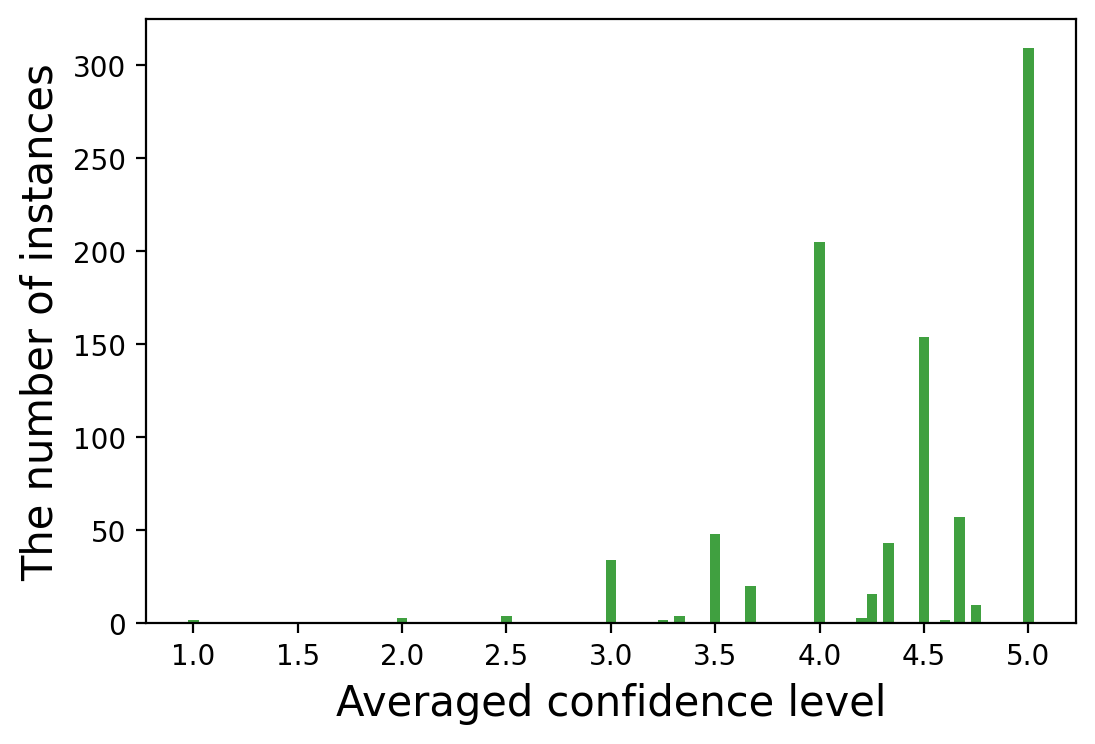

In [102]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

for hitid, annots in filtered_annotations_of_instance.items():
    conf = [int(annots[key]) for key in annots.keys() if key.startswith("Answer.Q2")]
    ave_conf = sum(conf)/len(conf)
    ave_conf = round(ave_conf, 2)
    annots['ave_conf'] = ave_conf
    
plot_dict = defaultdict(int)
for value in filtered_annotations_of_instance.values():
    plot_dict[value['ave_conf']] += 1

plt.bar(plot_dict.keys(), plot_dict.values(), width=0.05, color='g', alpha=0.75)
plt.xlabel("Averaged confidence level", fontsize=15)
plt.ylabel("The number of instances", fontsize=15)
plt.show()

In [11]:
import csv

csv_filename = 'batches/2_finished.csv'
        
# generate the html file
i = 0
html_filename = "check_new_instances.html"
with open(html_filename, 'w') as htmlfile:

    with open(csv_filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        
        # write the start
        htmlfile.write("<!DOCTYPE html>\n<html>\n<head>\n<title>Tweet Example</title>\n</head>\n<body>\n")

        # use a big table to display the tweet example
        htmlfile.write("""<table style=\"margin-left: auto; margin-right: auto; border: 1px solid black; line-height: 1.0em; width: 1200\">\n""")
        image_css = """style=\"display: block; margin-left: auto; margin-right: auto; max-width: 450px; max-height: 650px;\""""
        
        for row in reader:

            if int(row['Answer.Q2']) > 3.0 or row['Answer.Q1'] == 'No':
                continue
            
            i += 1
            if i == 100:
                break
            
            # 3 context tweets before
            htmlfile.write("<tr>\n")

            # context8_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['Input.context8_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            # context9_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['Input.context9_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            # context10_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['Input.context10_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            htmlfile.write("</tr>\n")
            
            # anchor tweet
            htmlfile.write("<tr>\n")

            # anchor_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['Input.anchor_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            htmlfile.write("</tr>\n")
            
            # 3 context tweets after
            htmlfile.write("<tr>\n")

            # context11_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['Input.context11_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            # context12_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['Input.context12_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            # context13_url
            htmlfile.write("<td style=\"width:400; border-bottom: 1px solid black;\">\n")
            htmlfile.write(f"<img src=\"{row['Input.context13_url']}\" {image_css}>\n")
            htmlfile.write("</td>\n")

            htmlfile.write("</tr>\n")
            
        htmlfile.write("</table>\n")

        # write the end
        htmlfile.write("</body>\n</html>")    

In [12]:
i

100